<a href="https://colab.research.google.com/github/asmit-chandra/Evolutionary-Stable-Stratergy/blob/main/ESS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Import all the necessary packages.

In [ ]:
V = 6.0        # Value
C = 4.0        # Cost
seed = 17
random.seed(seed)
np.random.seed(seed)

Define parameters. Using random for stochasticity.

In [ ]:
def payoff_H_vs_H(V, C): return (V - C) / 2
def payoff_H_vs_D(V, C): return V
def payoff_D_vs_H(V, C): return 0
def payoff_D_vs_D(V, C): return V / 2

Constructing payoff matrix.

In [ ]:
def replicator_sim(V, C, x0, dt, T):
    x = x0
    xs = [x]
    times = [0]

    for t in range(1, T + 1):
        # Fitness
        fH = x * payoff_H_vs_H(V, C) + (1 - x) * payoff_H_vs_D(V, C)
        fD = x * payoff_D_vs_H(V, C) + (1 - x) * payoff_D_vs_D(V, C)
        mean_f = x * fH + (1 - x) * fD

        # Increase in frequency of hawks
        dx = dt * x * (fH - mean_f)
        x += dx
        x = max(0, min(1, x))

        xs.append(x)
        times.append(t * dt)

    return np.array(times), np.array(xs)

Replicator function.

In [ ]:
def moran_process(V, C, N, generations, mu, init_hawks_frac=0.1):
    population = [1 if i < int(init_hawks_frac * N) else 0 for i in range(N)]
    random.shuffle(population)

    history = [sum(population) / N]

    for g in range(generations):
        payoffs = np.zeros(N)
        partners = np.random.randint(0, N, size=N)

        for i in range(N):
            j = partners[i]
            if i == j:
                continue
            si, sj = population[i], population[j]

            if si == 1 and sj == 1:
                payoffs[i] += payoff_H_vs_H(V, C)
            elif si == 1 and sj == 0:
                payoffs[i] += payoff_H_vs_D(V, C)
            elif si == 0 and sj == 1:
                payoffs[i] += payoff_D_vs_H(V, C)
            else:
                payoffs[i] += payoff_D_vs_D(V, C)

        min_pay = payoffs.min()
        fitnesses = payoffs - min_pay + 1e-10

        total = fitnesses.sum()
        if total == 0:
            probs = np.ones(N) / N
        else:
            probs = fitnesses / total

        reproducer = np.random.choice(np.arange(N), p=probs)
        die = random.randrange(N)

        offspring = population[reproducer]
        if random.random() < mu:
            offspring = 1 - offspring

        population[die] = offspring

        history.append(sum(population) / N)

    return np.array(history)

Moran stochastic model.

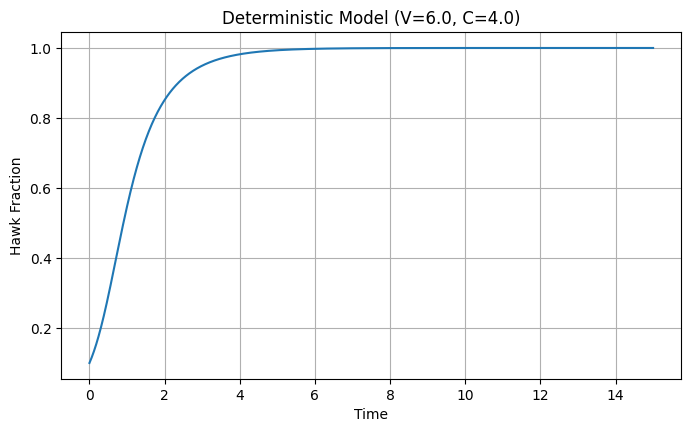

In [ ]:
times, xs = replicator_sim(V, C, x0=0.1, dt=0.01, T=1500)
plt.figure(figsize=(8,4.5))
plt.plot(times, xs)
plt.xlabel("Time")
plt.ylabel("Hawk Fraction")
plt.title(f"Deterministic Model (V={V}, C={C})")
plt.grid()
plt.show()

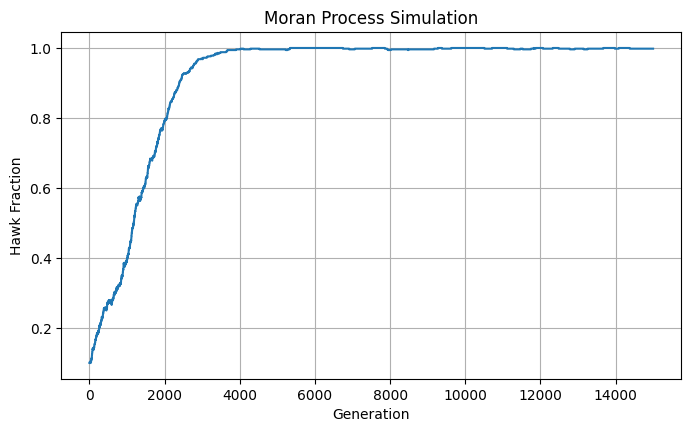

In [ ]:
history = moran_process(V, C, N=500, generations=15000, mu=0.002)
plt.figure(figsize=(8,4.5))
plt.plot(history)
plt.xlabel("Generation")
plt.ylabel("Hawk Fraction")
plt.title("Moran Process Simulation")
plt.grid()
plt.show()

In [ ]:
print(V/C)

1.5


Stable point for our model!